In [1]:
import tensorflow as tf
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
from stable_diffusion_tf.stable_diffusion import StableDiffusion
from PIL import Image

generator = StableDiffusion(
    img_height=512,
    img_width=512,
    jit_compile=False,
)

Metal device set to: Apple M1 Max


2022-10-08 15:15:18.033472: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-08 15:15:18.033590: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


2022-10-08 15:15:30.820558: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-08 15:15:30.821734: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
  0   1: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:40<00:00,  1.24it/s]
2022-10-08 15:16:12.865421: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


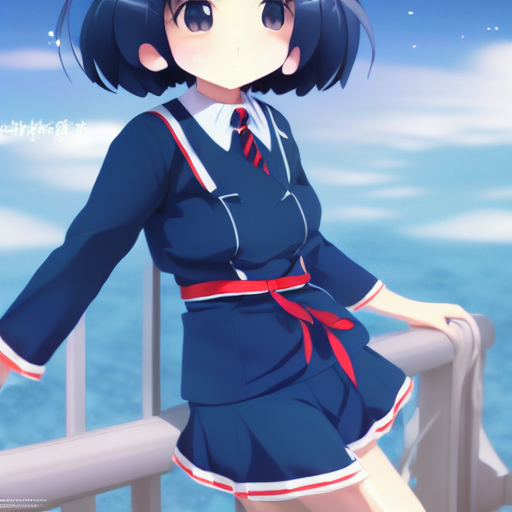

In [3]:
# text to image
prompt = "extremely detailed CG wallpaper," \
    "dark blue hair," \
    "short hair," \
    "light blue sailor suit," \
    "school student girl," \
    "pretty girl," \
    "slight smile," \
    "kawaii," \
    "soft focus," \
    "beautiful composition"

img = generator.generate(
    prompt,
    num_steps=50,
    unconditional_guidance_scale=7.5,
    temperature=1,
    batch_size=1,
)

pil_img = Image.fromarray(img[0])
pil_img.save("text_to_image.jpg")
display(pil_img)

  0   1: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:15<00:00,  1.59it/s]


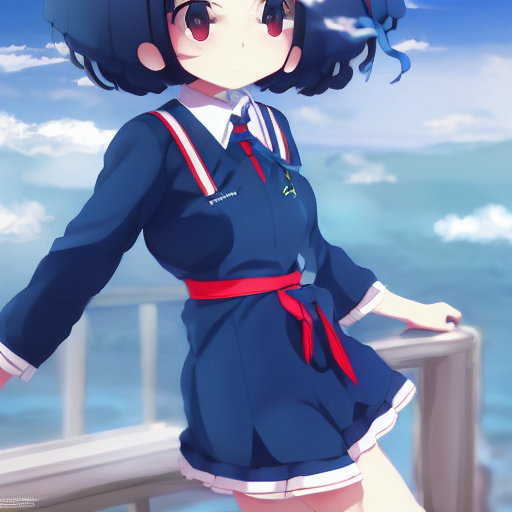

In [4]:
# image to image :
prompt = "extremely detailed CG wallpaper," \
    "dark blue hair," \
    "short hair," \
    "light blue sailor suit," \
    "school student girl," \
    "pretty girl," \
    "slight smile," \
    "kawaii," \
    "soft focus," \
    "beautiful composition"

img = generator.generate(
    prompt,
    num_steps=50,
    unconditional_guidance_scale=7.5,
    temperature=1,
    batch_size=1,
    input_image="text_to_image.jpg"
)

pil_img = Image.fromarray(img[0])
pil_img.save("image_to_image.jpg")
display(pil_img)